# # CP 217: Machine Learning for Cyber-Physical Systems 
## Week 3: Linear Regression, Polynomial Regression, Regularization
***
In this workshop, first we'll look at linear regression method. Briefly, this involves learning a linear regression model from a training set of $(\mathbf{x}, y)$ pairs, where $\mathbf{x}$ is a feature vector and $y$ is a real-valued response variable.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
#import csv

### 1. Review
In this week's lecture, we saw that a linear model can be expressed as:
$$y = w_0 + \sum_{j = 1}^{m} w_j x_j = \mathbf{w} \cdot \mathbf{x} $$
where 

* $y$ is the *target (or output) variable*;
* $\mathbf{x} = [x_1, \ldots, x_m]$ is a vector of *features* or *predictors* (we define $x_0 = 1$); and
* $\mathbf{w} = [w_0, \ldots, w_m]$ are the *weights*.

To fit the model, we will *minimise* the residual sum of squares (RSS) (simple case) which is also an MLE estimate for linear regression:

$$RSS(\mathbf{w}) = \sum_{i=1}^{n}(y_i - \mathbf{w} \cdot \mathbf{x}_i)^2$$

**Note:** For simplicity, we'll consider the case $m = 1$ (i.e. only one feature excluding the intercept).

***Problem Statement***

You are given the air quality data of few major cities in India. This data includes several air quality related variables such as PM2.5, PM10, NOx, CO etc. and Air quality index (AQI). Your task is to learn a regression model on the given data to predict AQI from the input variables.

In [2]:
#load air quality index data  (https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)
data=pd.read_csv('AQI_data.csv')
data

,City,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,69.415987,118.127103,39.480968,22.424793,23.483476,46.350645,43.602903,1.463871,2.531290,2.976452,184.257428
1,Ahmedabad,67.450578,118.127103,32.309123,2.248598,23.483476,34.491430,14.531977,3.280840,8.700972,3.070128,166.463582
2,Ahmedabad,67.450578,118.127103,32.309123,2.248598,23.483476,34.491430,14.531977,0.000000,0.000000,0.000000,166.463582
3,Ahmedabad,88.851290,118.127103,95.549355,33.074194,23.483476,51.065161,109.395807,18.272581,72.700323,13.217742,675.208503
4,Ahmedabad,89.456452,118.127103,47.808065,42.160000,23.483476,52.384562,63.513226,4.097097,32.354839,6.971613,755.516129
...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thiruvananthapuram,35.939032,64.680323,20.644839,0.993871,12.675484,44.511613,8.728387,3.280840,8.700972,3.070128,78.258065
82,Visakhapatnam,68.472258,112.014839,32.923548,1.264194,13.729032,71.178710,7.948710,5.751613,8.690323,5.239032,139.548387
83,Visakhapatnam,95.759088,187.477462,49.753141,1.458897,17.840014,58.390138,13.855353,4.461694,7.504610,2.483883,216.188849
84,Visakhapatnam,113.826148,212.379355,47.858065,1.102258,13.870323,79.952903,19.301290,4.615161,7.449032,2.860000,263.129032


In [3]:
data.describe()

,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene,AQI
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,99.590959,147.684710,43.517865,2.952317,28.308431,36.732336,17.252148,4.003259,9.955184,2.888525,218.596588
std,61.128516,69.500772,32.936226,6.388391,23.353292,17.483902,17.861501,6.081830,11.832329,2.169866,122.624385
min,33.954876,50.716129,0.000000,0.000000,2.434839,6.630968,3.890323,0.000000,0.000000,0.000000,78.258065
25%,62.167097,114.707340,22.081048,0.931371,17.850817,25.416048,7.983878,0.902710,2.478065,2.000000,140.435484
50%,69.323477,118.127103,32.426820,1.355468,23.483476,34.491430,13.290000,3.126613,8.668351,3.070128,166.463582
75%,122.988710,169.921278,49.667517,2.054919,27.178790,44.889274,15.999113,4.199677,9.069363,3.070128,291.588710
max,294.982903,419.129677,182.094839,42.160000,146.495484,118.719032,109.395807,37.672258,72.700323,14.537419,755.516129


In [4]:
# removing probable outliers (
index_names = data[ data['AQI'] > 600 ].index  # you can use z-score to find the indices of outliers in AQI)
data.drop(index_names, inplace = True) #drop index_names from data

In [5]:
data

,City,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,69.415987,118.127103,39.480968,22.424793,23.483476,46.350645,43.602903,1.463871,2.531290,2.976452,184.257428
1,Ahmedabad,67.450578,118.127103,32.309123,2.248598,23.483476,34.491430,14.531977,3.280840,8.700972,3.070128,166.463582
2,Ahmedabad,67.450578,118.127103,32.309123,2.248598,23.483476,34.491430,14.531977,0.000000,0.000000,0.000000,166.463582
5,Ahmedabad,54.211613,113.567419,20.024516,15.889032,23.483476,26.437097,51.154516,2.349677,30.991935,1.893226,277.640462
6,Amaravati,78.150645,137.127742,26.516774,0.069355,21.212903,68.874194,14.839355,0.196129,5.989032,0.095484,172.451613
...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thiruvananthapuram,35.939032,64.680323,20.644839,0.993871,12.675484,44.511613,8.728387,3.280840,8.700972,3.070128,78.258065
82,Visakhapatnam,68.472258,112.014839,32.923548,1.264194,13.729032,71.178710,7.948710,5.751613,8.690323,5.239032,139.548387
83,Visakhapatnam,95.759088,187.477462,49.753141,1.458897,17.840014,58.390138,13.855353,4.461694,7.504610,2.483883,216.188849
84,Visakhapatnam,113.826148,212.379355,47.858065,1.102258,13.870323,79.952903,19.301290,4.615161,7.449032,2.860000,263.129032


In [6]:
data.describe()

,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene,AQI
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,99.839461,148.388462,42.847369,2.126965,28.423311,36.375371,15.604473,3.832269,8.941555,2.716950,206.768833
std,61.838877,70.179757,32.827429,3.413632,23.620828,17.535594,13.996228,5.949544,9.426532,1.818148,96.292389
min,33.954876,50.716129,0.000000,0.000000,2.434839,6.630968,3.890323,0.000000,0.000000,0.000000,78.258065
25%,62.082823,113.485219,21.563705,0.909194,17.688801,25.258998,7.965048,0.845639,2.373629,1.936532,138.975806
50%,69.086774,118.127103,32.309123,1.336113,23.483476,34.491430,13.115000,3.040740,8.447775,3.070128,166.463582
75%,128.478387,170.748871,49.496269,2.024435,28.114758,43.165726,15.834597,4.031855,8.843145,3.070128,286.930571
max,294.982903,419.129677,182.094839,22.424793,146.495484,118.719032,88.850634,37.672258,42.005161,14.537419,441.903226


In [7]:
x_=data.iloc[:,1]  #choosing second col of data 
y_=data.iloc[:,11] #choosing AQI col of data which will act as target

In [8]:
# basic preprocessing
x_=np.array(x_)
y_=np.array(y_)

x=[]
y=[]
for i in range(len(data)):
    x.append([x_[i]])
    y.append([y_[i]])
x=np.array(x)
y=np.array(y)    

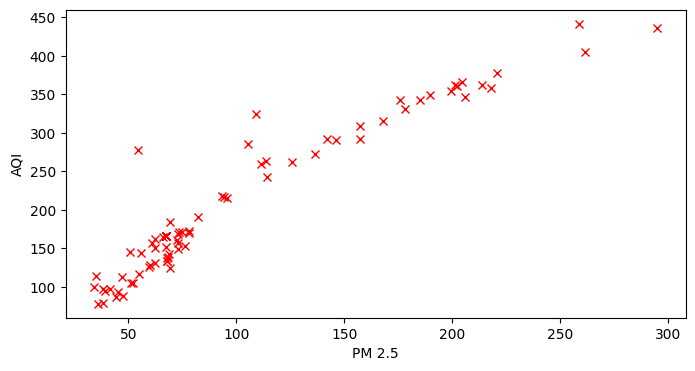

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'rx')
#plt.scatter(x, y, alpha=0.2, color='red') # use this for scatter plot
plt.ylabel("AQI")
plt.xlabel("PM 2.5")
plt.show()

### Minimising Sum of Squared Residuals: Iterative Solution 

Now we are going to fit a line, $y_i=w_0 + w_1x_i$, to the data you've plotted. We are trying to minimize the error function

$$E(w_0, w_1) = \sum_{i=1}^N(y_i-w_0-w_1x_i)^2$$

with respect to $w_0$ and $w_1$. We can start with an initial guess for $w_1$ (why $w_1$?)

In [10]:
w_1= 10

Then we use the maximum likelihood update, derived in the lecture to find an estimate for the offset, $w_0$,

$$w_0 = \frac{\sum_{i=1}^N(y_i-w_1 x_i)}{N}$$

In [11]:
w_0 = (y - w_1*x).mean()
w_0

-791.6257759613096

And now we can make an estimate for the slope of the line, using this estimate of *w_0*,

$$w_1 = \frac{\sum_{i=1}^N (y_i - w_0) \times x_i}{\sum_{i=1}^N x_i^2}$$

In [12]:
w_1 = ((y - w_0)*x).sum() / (x**2).sum()
w_1

7.660521425687826

We can have a look at how good our fit is by computing the prediction across the input space. First create a vector of 'test points'

In [13]:
#range of x-axis of data
ll=20
ul=300
x_test = np.arange(ll, ul)[:, None]
x_test

array([[ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
       [ 80],
       [ 81],
       [ 82],
       [ 83],
       [ 84],
       [ 85],
       [ 86],
       [ 87],
       [ 88],
       [ 89],
       [ 90],
      

Now use this vector to compute some test predictions,

In [14]:
f_test = w_1 * x_test + w_0
f_test

array([[-638.41534745],
       [-630.75482602],
       [-623.0943046 ],
       [-615.43378317],
       [-607.77326174],
       [-600.11274032],
       [-592.45221889],
       [-584.79169747],
       [-577.13117604],
       [-569.47065462],
       [-561.81013319],
       [-554.14961176],
       [-546.48909034],
       [-538.82856891],
       [-531.16804749],
       [-523.50752606],
       [-515.84700464],
       [-508.18648321],
       [-500.52596179],
       [-492.86544036],
       [-485.20491893],
       [-477.54439751],
       [-469.88387608],
       [-462.22335466],
       [-454.56283323],
       [-446.90231181],
       [-439.24179038],
       [-431.58126895],
       [-423.92074753],
       [-416.2602261 ],
       [-408.59970468],
       [-400.93918325],
       [-393.27866183],
       [-385.6181404 ],
       [-377.95761897],
       [-370.29709755],
       [-362.63657612],
       [-354.9760547 ],
       [-347.31553327],
       [-339.65501185],
       [-331.99449042],
       [-324.333

In [15]:
y_hat = w_0 + w_1*x
y_hat

array([[-259.86311835],
       [-274.9191784 ],
       [-274.9191784 ],
       [-376.33655382],
       [-192.95108428],
       [ -77.90735038],
       [-428.39103247],
       [-218.63739988],
       [-473.42254272],
       [-399.552876  ],
       [-274.9191784 ],
       [-271.51838046],
       [-522.9316086 ],
       [-497.92632676],
       [-372.40744764],
       [-490.46596733],
       [-235.35330594],
       [-274.9191784 ],
       [  61.51413956],
       [-233.39573783],
       [-444.13216844],
       [-274.9191784 ],
       [-363.32849418],
       [-261.28046427],
       [-209.50275282],
       [-315.98647177],
       [-452.80338443],
       [-498.63801395],
       [ 554.25617589],
       [1188.94520218],
       [ 736.14413636],
       [ 662.22998974],
       [ 773.77953735],
       [ 411.93851397],
       [-402.34061597],
       [-229.51029838],
       [ 877.07810434],
       [ 627.03112943],
       [ 326.24446181],
       [  84.11514905],
       [ 294.35212462],
       [-274.919

Now plot those test predictions with a blue line on the same plot as the data,

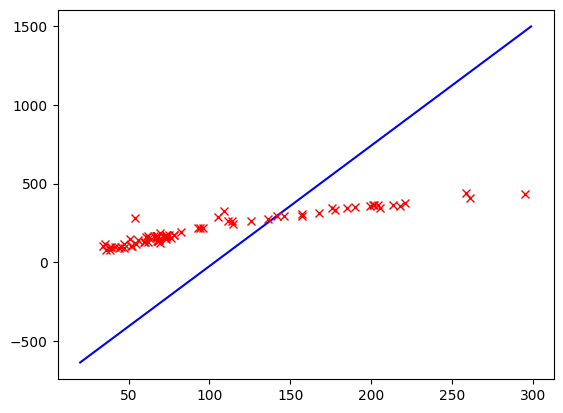

In [16]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Next compute the quality of the fit by evaluating the average sum of squares error of the prediction over the training samples, $E(w_0,w_1)$

$$E(w_0, w_1) = \sum_{i=1}^N(y_i-w_0-w_1x_i)^2$$

In [17]:
RSS= ((y - w_0 - w_1*x)**2).sum()
RSS

16738107.875620238

The fit isn't very good, we need to iterate between these parameter updates in a loop to improve the fit, we have to do this several times,

In [18]:
for i in np.arange(10):
    w_1 = ((y - w_0)*x).sum()/(x*x).sum()
    w_0 = (y - w_1*x).sum()/y.shape[0]
    if i % 10 == 0: 
        print ('iterations', i, 'training error E', ((y - w_0 - w_1*x)**2).sum())
(w_0, w_1)

iterations 0 training error E 12155403.053897813


(23.96783983084003, 1.8309493188843053)

And let's try plotting the result again

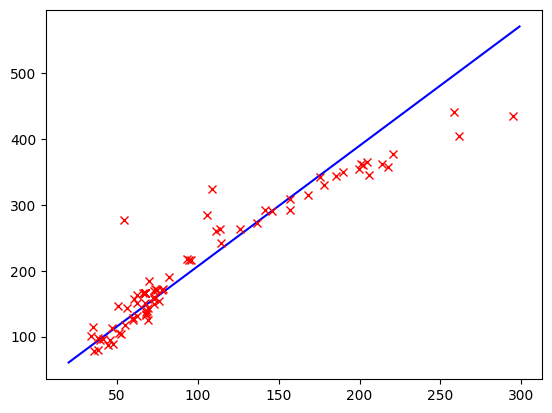

In [19]:
f_test = w_0 + w_1*x_test
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Does more than 10 iterations considerably improve fit in this case?

### Analytical  Solution (Normal Equation): Direct Solution with Linear Algebra

In lecture, we saw that it's possible to solve for the optimal weights $\mathbf{w}^\star$ analytically. The solution is (Maximum Likelihood estimate)
$$\mathbf{w}^* = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}$$
where
$$\mathbf{X} = \begin{pmatrix} 
        1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n 
    \end{pmatrix} 
  \quad \text{and} \quad 
  \mathbf{y} = \begin{pmatrix} 
          y_1 \\ y_2 \\ \vdots \\ y_n
      \end{pmatrix}
$$

We construct $\mathbf{X}$ in the code block below, remembering to include the $x_0 = 1$ column for the bias (intercept).

In [20]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[  1.          69.41598725]
 [  1.          67.45057795]
 [  1.          67.45057795]
 [  1.          54.2116129 ]
 [  1.          78.15064516]
 [  1.          93.1683871 ]
 [  1.          47.41645161]
 [  1.          74.7975685 ]
 [  1.          41.53806452]
 [  1.          51.18096774]
 [  1.          67.45057795]
 [  1.          67.89451613]
 [  1.          35.07517993]
 [  1.          38.33935484]
 [  1.          54.72451613]
 [  1.          39.31322581]
 [  1.          72.61548387]
 [  1.          67.45057795]
 [  1.         111.3683871 ]
 [  1.          72.87102367]
 [  1.          45.3616129 ]
 [  1.          67.45057795]
 [  1.          55.90967742]
 [  1.          69.23096774]
 [  1.          75.99      ]
 [  1.          62.08967742]
 [  1.          44.22967742]
 [  1.          38.24645161]
 [  1.         175.6906452 ]
 [  1.         258.5425806 ]
 [  1.         199.4341935 ]
 [  1.         189.7854839 ]
 [  1.         204.3470968 ]
 [  1.         157.1125806 ]
 [  1.        

To get the solution using Normal eequation, we solve the following system of linear equations:
$$\mathbf{X}^\top\mathbf{X} \mathbf{w}^\star = \mathbf{X}^\top\mathbf{y}$$

This can be done in numpy using the command `np.linalg.solve`. Dot product can be done using `np.dot`. (Try `np.linalg.solve?` or `np.dot?` in a cell to see what inputs they take", for transpose of a matrix `X` you can use `X.T`)

In [21]:
np.linalg.solve?

Signature:       np.linalg.solve(a, b)
Call signature:  np.linalg.solve(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function solve at 0x108680ca0>
File:            ~/Applications/miniconda3/lib/python3.9/site-packages/numpy/linalg/linalg.py
Docstring:      
Solve a linear matrix equation, or system of linear scalar equations.

Computes the "exact" solution, `x`, of the well-determined, i.e., full
rank, linear matrix equation `ax = b`.

Parameters
----------
a : (..., M, M) array_like
    Coefficient matrix.
b : {(..., M,), (..., M, K)}, array_like
    Ordinate or "dependent variable" values.

Returns
-------
x : {(..., M,), (..., M, K)} ndarray
    Solution to the system a x = b.  Returned shape is identical to `b`.

Raises
------
LinAlgError
    If `a` is singular or not square.

See Also
--------
scipy.linalg.solve : Similar function in SciPy.

Notes
-----

.. versionadded:: 1.8.0

Broadcasting rules apply, see the `numpy.linalg` documentation for
det

In [22]:
w = np.linalg.solve(X.T @ X, X.T @ y)
print(w)

[[58.1210549 ]
 [ 1.48886799]]


Let's examine the quality of fit for these values for the weights $w_0$ and $w_1$. We create a vector of "test" values `x_test` and a function to compute the predictions according to the model.

In [23]:
x_test = np.arange(ll, ul)[:, None]

def predict(x_test, w0, w1): 
    return  w_1 * x_test + w_0

In [24]:
w0, w1 = w

Now plot the test predictions with a blue line on the same plot as the data.

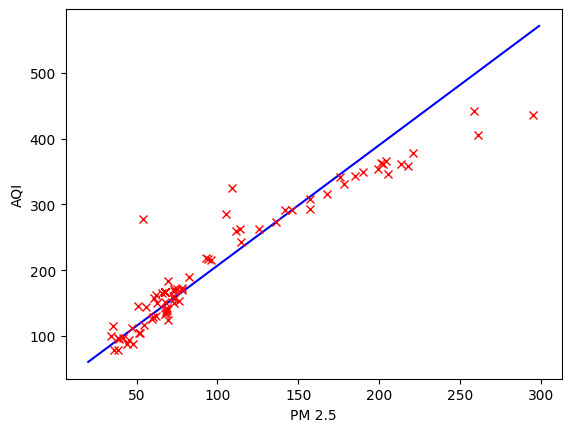

In [25]:
def plot_fit(x_test, y_test, x, y): 
    plt.plot(x_test, y_test, 'b-')
    plt.plot(x, y, 'rx')
    plt.ylabel("AQI")
    plt.xlabel("PM 2.5")
    plt.show()


plot_fit(x_test, predict(x_test, w0, w1), x, y)

We'll compute the residual sum of squares $RSS(w_0,w_1)$ on the training set to measure the goodness of fit.

Expanding out the RSS for this simple case (where $\mathbf{w}=[w_0, w_1]$) we have:
$$RSS(w_0, w_1) = \sum_{i=1}^{n}(y_i - w_0 - w_1 x_i)^2$$

In [26]:
def compute_RSS(x, y, w0, w1): 
    return  ((y - w0 - w1 * x) ** 2).sum()

print(compute_RSS(x, y, w0, w1))

66014.31102761332


### Hold Out Validation

The error we computed above is the *training* error. It doesn't assess the model's generalization ability, it only assesses how well it's performing on the given training data.

In [27]:
import random

x_train = x
y_train = y

indices_hold_out=random.sample(range(0,84), 30)
#print(indices_hold_out)
x_train = np.delete(x, indices_hold_out)[:,None]
y_train = np.delete(y, indices_hold_out)[:,None]

# Create a hold out set
x_hold_out = x[indices_hold_out]
y_hold_out = y[indices_hold_out]



***Home Exercise:*** Now use the training set and hold out set to compute the errors like above.

You might also consider *leave one out* cross validation, where the model is trained *n-1* times with each data point excluded once from training and used for testing, or *k-fold cross validation* in which the data is split into equal size folds and the model is trained *k* times with each fold used once for testing.

## Polynomial Regression


Now we will consider a more complex polynomial function. Where before we had instances of the form,
$$\phi(\mathbf{x}) = [ 1~ x ]$$ 
now we will be using e.g., 
$$\phi(\mathbf{x}) = [ 1 ~x~ x^2~ x^3~ x^4]$$ 
for a quartic model. Each element $w_i$ of the weight vector corresponds to the coefficient of the input year raised to the $i^{th}$ power. We will consider a range of polynomial models of different orders. 

To implement this we will use *basis functions* which provide a neat way of representing our data instances such that we can still use all the linear models to achieve learn a non-linear model. 

### Data Preparation

The first thing we'll do is plot the training error for the polynomial fit. To do this let's set up some parameters.

In [28]:
num_data = x.shape[0]
num_pred_data = 30 # how many points to use for plotting predictions
x_pred = np.linspace(ll,ul, num_pred_data)[:, None] # input locations for predictions
order = 4 # The polynomial order to use.
print ('Num of training samples: ',num_data)
print('Num of testing samples: ',num_pred_data)

Num of training samples:  84
Num of testing samples:  30


Now let's build the *basis* matrices $\Phi$ to represent the training data, where each column is raising the input year $X$ to various powers.

In [29]:
Phi = np.zeros((num_data, order+1))
Phi_pred = np.zeros((num_pred_data, order+1))
for i in range(0, order+1):
    Phi[:, i:i+1] = x ** i
    Phi_pred[:, i:i+1] = x_pred ** i

In [30]:
Phi_pred

array([[1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05],
       [1.00000000e+00, 2.96551724e+01, 8.79429251e+02, 2.60796261e+04,
        7.73395807e+05],
       [1.00000000e+00, 3.93103448e+01, 1.54530321e+03, 6.07464021e+04,
        2.38796201e+06],
       [1.00000000e+00, 4.89655172e+01, 2.39762188e+03, 1.17400795e+05,
        5.74859067e+06],
       [1.00000000e+00, 5.86206897e+01, 3.43638526e+03, 2.01443274e+05,
        1.18087436e+07],
       [1.00000000e+00, 6.82758621e+01, 4.66159334e+03, 3.18274304e+05,
        2.17304525e+07],
       [1.00000000e+00, 7.79310345e+01, 6.07324614e+03, 4.73294354e+05,
        3.68843186e+07],
       [1.00000000e+00, 8.75862069e+01, 7.67134364e+03, 6.71903891e+05,
        5.88495132e+07],
       [1.00000000e+00, 9.72413793e+01, 9.45588585e+03, 9.19503383e+05,
        8.94137772e+07],
       [1.00000000e+00, 1.06896552e+02, 1.14268728e+04, 1.22149330e+06,
        1.30573421e+08],
       [1.00000000e+00, 1.1655

### Fitting the model

Now we can solve for the regression weights and make predictions both for the training data points, and the test data points. That involves solving the linear system given by

$$\Phi' \Phi \mathbf{w} = \Phi' \mathbf{y}$$

with respect to $\mathbf{w}$.

In [31]:
# solve the linear system
w = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)
print(w)

[[ 2.30785509e+00]
 [ 2.33571539e+00]
 [ 2.66469949e-03]
 [-4.60566052e-05]
 [ 9.33517184e-08]]


In [32]:
#use resulting vector to make predictions at the training points and test points
f = Phi @ w
f_pred = Phi_pred @ w

In [33]:
f_pred.shape

(30, 1)

In [34]:
# compute the residual sum of squares (error)
RSS = (((y-f)**2).sum())
RSS

47231.18909799397

The error is: 47231.1891


Text(0, 0.5, 'AQI')

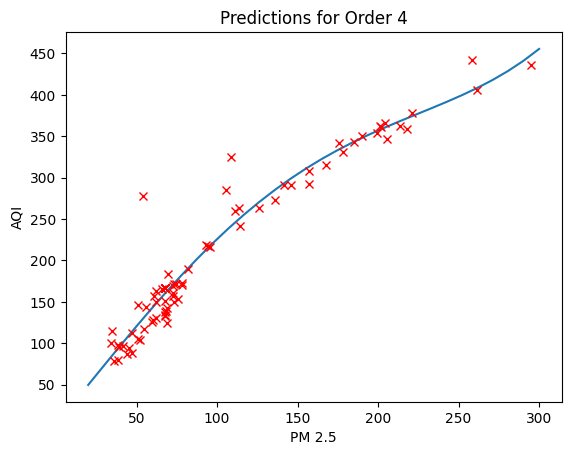

In [35]:
#Now we have the fit and the error, so let's plot the fit and the error.

print("The error is: %2.4f"%RSS)
plt.plot(x_pred, f_pred)
plt.plot(x, y, 'rx')
ax = plt.gca()
ax.set_title('Predictions for Order 4')
ax.set_xlabel('PM 2.5')
ax.set_ylabel('AQI')

Now use the loop structure below to compute the error for different model orders.

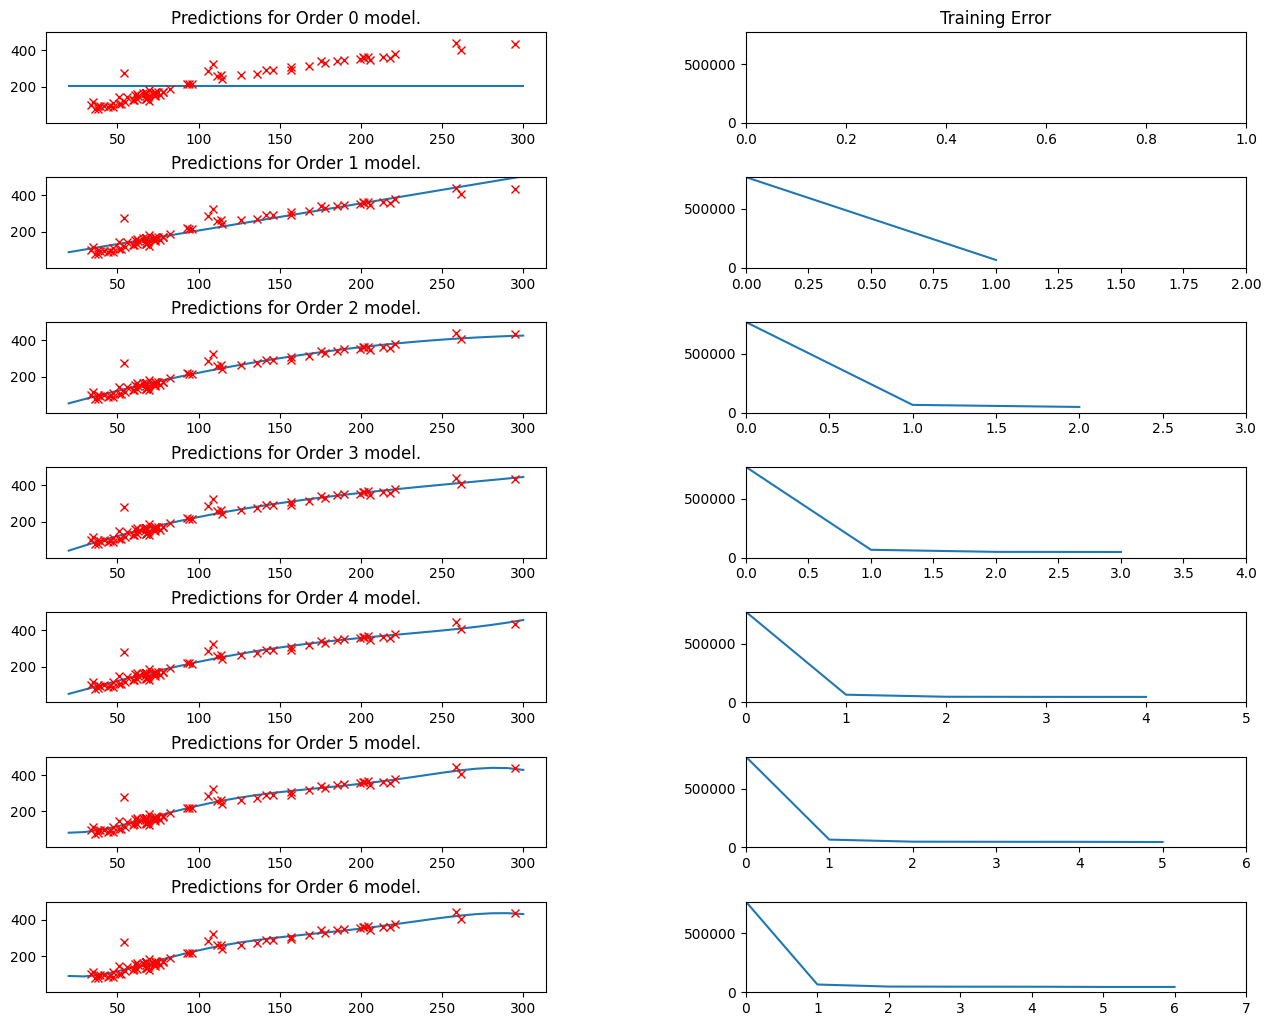

Training error list:  [769594.61  66014.31  48513.85  47511.94  47231.19  45415.99  45377.23]


In [36]:
# import the time model to allow python to pause.
# import the IPython display module to clear the output.
import time
from IPython.display import clear_output

error_list = []
max_order = 6
fig1=plt.figure(figsize=(15,2*max_order))
index=1

for order in range(0, max_order+1):
    # 1. build the basis set
    Phi = np.zeros((num_data, order+1))
    Phi_pred = np.zeros((num_pred_data, order+1))
    for i in range(0, order+1):
        Phi[:, i:i+1] = x**i
        Phi_pred[:, i:i+1] = x_pred**i
    # 2. solve the linear system
    w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))

    # 3. make predictions at training and test points
    f = np.dot(Phi, w)
    f_pred = np.dot(Phi_pred, w)
    
    # 4. compute the training error and append it to a list.
    RSS = (((y-f)**2).sum())  
    error_list.append(RSS)
    
    # 5. plot the predictions
    fig1.add_subplot(max_order+1,2,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim((2.5, 500))
    if (order <7):
        plt.title('Predictions for Order ' + str(order) + ' model.')
    
    
    fig1.add_subplot(max_order+1,2,index+1)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
    plt.plot(np.arange(0, order+1), np.asarray(error_list))
    plt.xlim((0, order+1))
    plt.ylim((0, np.max(error_list)))
    if (order ==0):
        plt.title('Training Error')
    index= index+2

plt.show()
#display(fig)
print('Training error list: ',np.around(error_list,2))

**Home Task:** Looks like a great fit. Does that mean we can stop here, our job is done? You might want to try an order 20 or higher model, also to see if the fits continue to improve with higher order models.

**Discussion:** What do you think might happen if we try to fit an order 100 model to this data? Is this even a reasonable thing to try?

### Model Generalization using Hold-out Validation
The error we computed above is the training error. It doesn't assess the model's generalization ability, it only assesses how well it's performing on the given training data. 


In hold out validation, we keep back some of the training data for assessing generalization performance. To perform hold out validation, we first remove the hold out set from training data to create train, test (or prediction) or validation set (hold out). 

In [37]:
import random
# Create a training set
x_train = x
y_train = y

indices_hold_out=random.sample(range(0,84), 30)
#print(indices_hold_out)
x_train = np.delete(x, indices_hold_out)[:,None]
y_train = np.delete(y, indices_hold_out)[:,None]

# Create a hold out set
x_hold_out = x[indices_hold_out]
y_hold_out = y[indices_hold_out]


print ('Whole dataset size', x.shape)
print('Train split size: ', x_train.shape)
print('Hold-Out split size: ', x_hold_out.shape)

# Now use the training set and hold out set.

Whole dataset size (84, 1)
Train split size:  (54, 1)
Hold-Out split size:  (30, 1)


Now you have the training and hold out data, you should be able to use the code above to evaluate the model on the hold out data. Do this in the code block below.



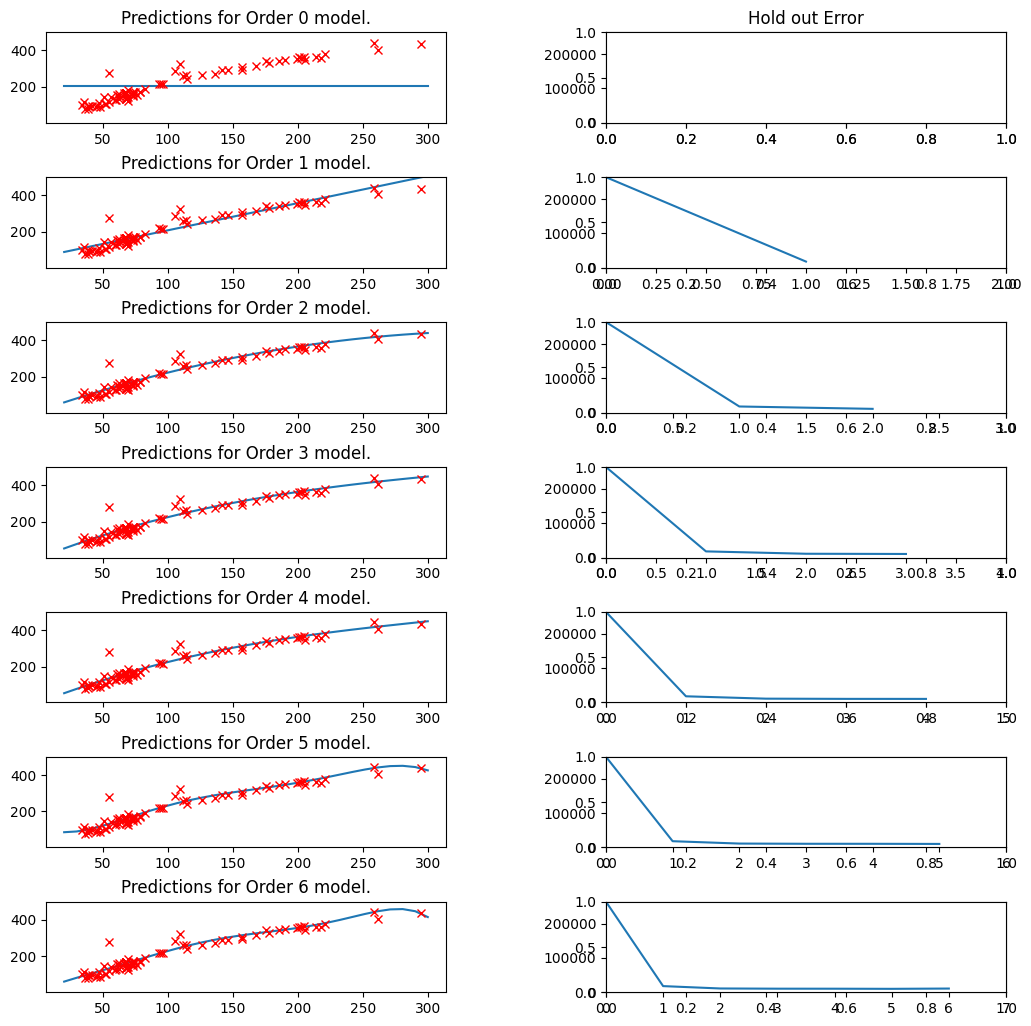

Holdout error list:  [263697.21  17957.39  11075.34  10455.82  10385.4   10026.51  10847.77]


In [38]:
from IPython.display import clear_output

error_list = []
max_order = 6
fig2=plt.figure(figsize=(12,max_order*2))
index = 1
for order in range(0, max_order+1):
    # 1. build the basis set using x_train, x_hold_out, and prediction set
    Phi = np.zeros((x_train.shape[0], order+1))
    Phi_pred = np.zeros((num_pred_data, order+1))
    Phi_hold_out = np.zeros((x_hold_out.shape[0], order+1))
    for i in range(0, order+1):
        Phi[:, i:i+1] = x_train**i
        Phi_hold_out[:, i:i+1] = x_hold_out**i
        Phi_pred[:, i:i+1] = x_pred**i
        
    # 2. solve the linear system
    w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y_train))

    # 3. make predictions at training, hold_out, and prediction points
    f = np.dot(Phi, w)
    f_hold_out = np.dot(Phi_hold_out, w)
    f_pred = np.dot(Phi_pred, w)
    
    # 4. compute the hold out error and append it to a list.
    error = (((y_hold_out-f_hold_out)**2).sum())   
    error_list.append(error)
    
    # 5. plot the predictions
    fig2.add_subplot(max_order+1,2,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim((2.5, 500))
    if (order <7):
        plt.title('Predictions for Order ' + str(order) + ' model.')
    
    fig2.add_subplot(max_order+1,2,index+1)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
    fig2.add_subplot(max_order+1,2,index+1)
    plt.plot(np.arange(0, order+1), np.asarray(error_list))
    plt.xlim((0, order+1))
    plt.ylim((0, np.max(error_list)))
    if (order ==0):
        plt.title('Hold out Error')
    index= index+2

plt.show()
#display(fig)
print('Holdout error list: ', np.around(error_list,2))

**Discussion:** What is going on here? Does this match your earlier findings, or your intuition about which model order was most appropriate? Why isn't hold-out error behaving the same as training error?

## Regularizing the Model, Using Ridge Regression

A nice way to limit model complexity is *regularisation* where model parameters are penalised from moving to high magnitude values (which means the model is getting overly confident).

For this exercise, we'll use a 6th order model, which you might consider much too powerful for this simple problem. As a first step, we'll preprocess the features to ensure they are all operating in a similar range, which means the weights for the 6th order features will take on radically different values to the 1st order features. (Recall that when we regularize, we encourage weights to be small. A weight associated with the higher orders of feature can be smaller than a weight associated with the other (low orders) feature and express the same thing. So, we're not letting the data decide which features to weight more heavily, we've accidentally biased it towards favoring the first to the second.)


To correct for this, and allow regularisation with a single constant, we'll normalize (z-score) the columns of training Phi to have zero mean and unit standard deviation. This same transformation is also applied to the testing basis matrices.

In [39]:
order = 6
Phi = np.zeros((x_train.shape[0], order+1))
Phi_pred = np.zeros((num_pred_data, order+1))
Phi_hold_out = np.zeros((x_hold_out.shape[0], order+1))
for i in range(0, order+1):
    Phi[:, i:i+1] = x_train**i
    if i > 0:
        mean = Phi[:, i:i+1].mean()
        std = Phi[:, i:i+1].std()
        print(i,mean,std)
    else: # as the first column is constant, need to avoid divide by zero 
        mean = 0
        std = 1
    
    Phi[:, i:i+1] = (Phi[:, i:i+1] - mean) / std
    Phi_hold_out[:, i:i+1] = (x_hold_out**i - mean) / std
    Phi_pred[:, i:i+1] = (x_pred**i - mean) / std


1 95.81500144222224 61.8364473984872
2 13004.260728238922 17870.966705175197
3 2324026.5562057104 4685934.754950068
4 488482248.06549746 1255055084.987651
5 112382392515.03273 346758134574.81085
6 27359083961598.33 98020934886622.2


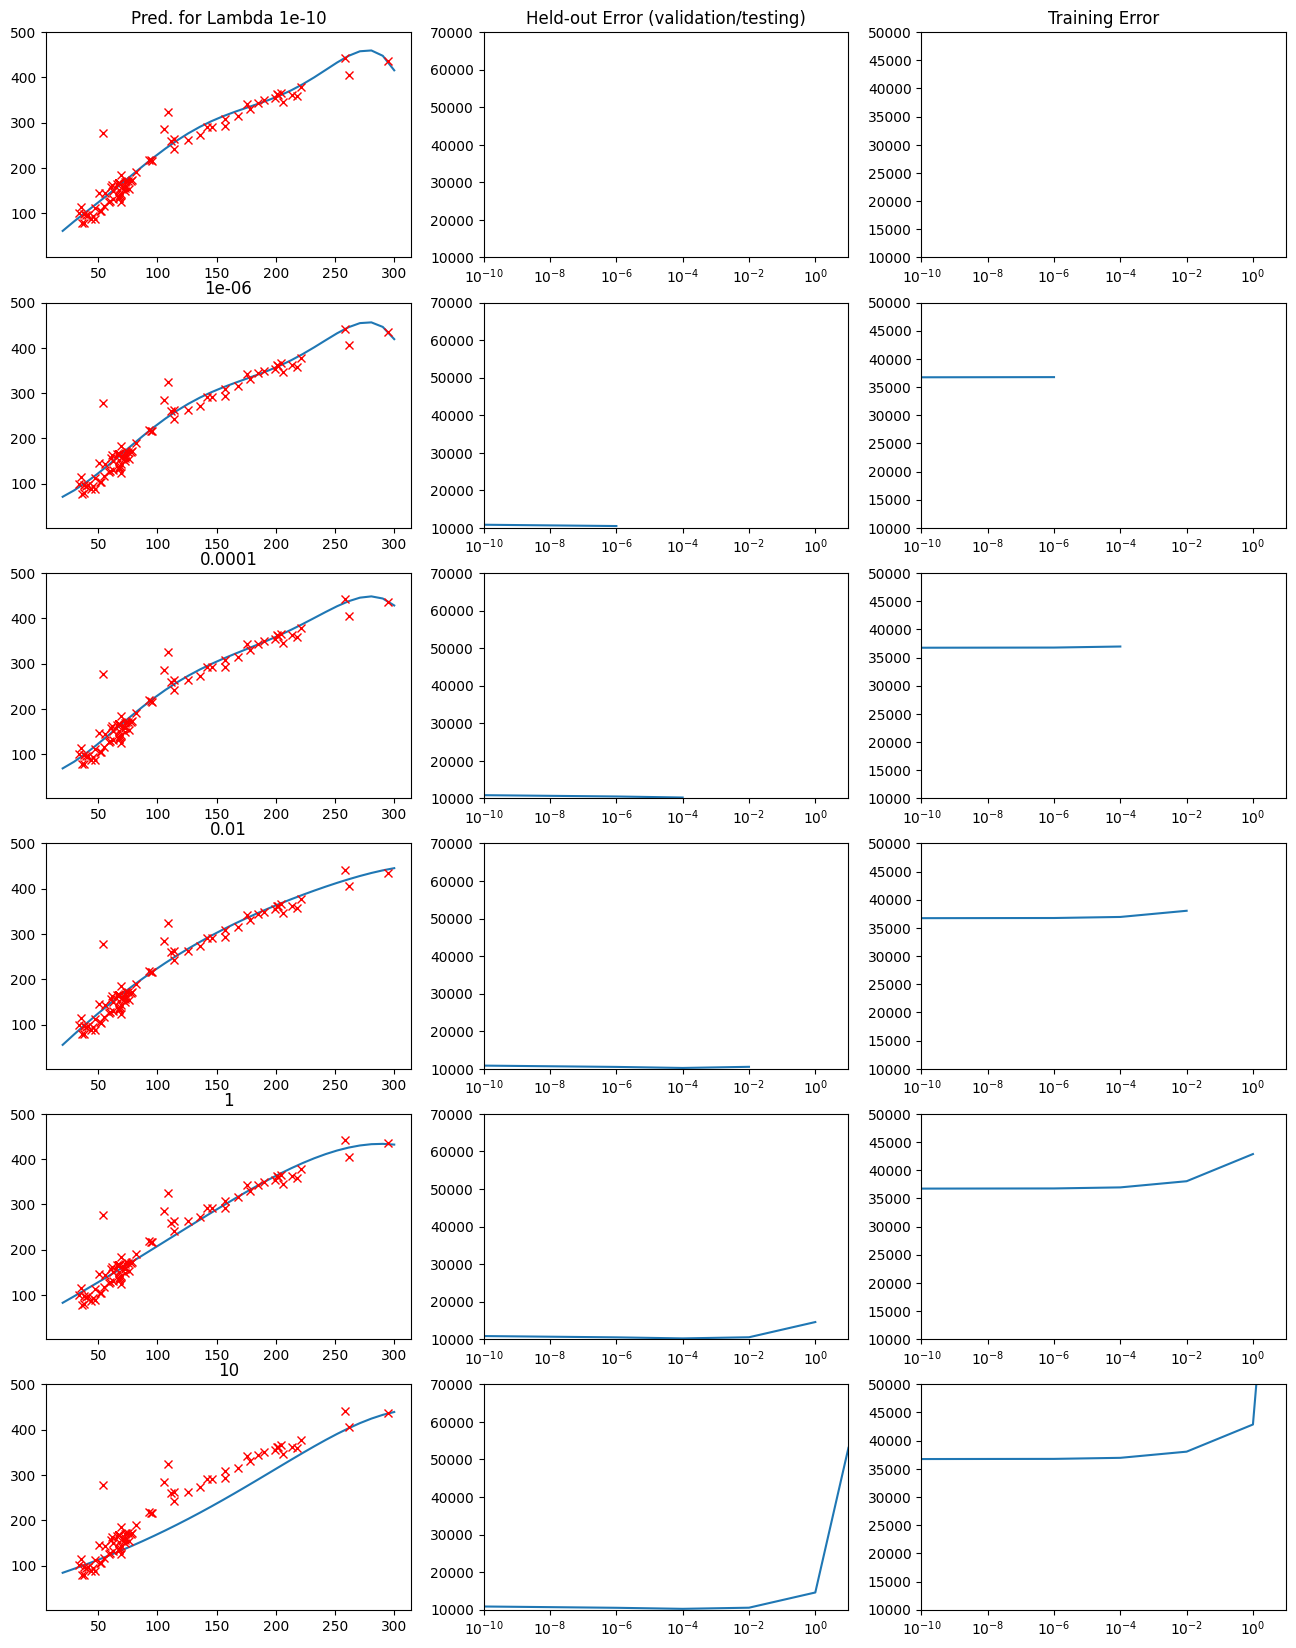

Holdout error list:  [10847.68 10502.5  10225.3  10527.06 14576.46 53090.57]


In [40]:
#Next we'll perform training, trying out different values of the regularisation coefficient, lambda.

error_list = []
train_error_list = []
lambdas = [1e-10, 1e-6, 1e-4, 1e-2, 1, 10] 
order = 6
#fig, axes = plt.subplots(nrows=1, ncols=3)
fig3=plt.figure(figsize=(16,order*4))
index =1
for l, lamba in enumerate(lambdas):
    # 1. build the basis set using x_train, x_hold_out
    # done above
        
    # 2. solve the linear system
    w =  np.linalg.solve(np.dot(Phi.T, Phi) + lamba * np.eye(order+1), np.dot(Phi.T, y_train))#.....write your code here 

    # 3. make predictions at training and test points
    f = np.dot(Phi, w)
    f_hold_out = np.dot(Phi_hold_out, w)
    f_pred = np.dot(Phi_pred, w)
    
    # 4. compute the hold and training error and append it to a list.
    error = (((y_hold_out-f_hold_out)**2).sum())  
    error_list.append(error)
    train_error = (((y_train-f)**2).sum())   
    train_error_list.append(train_error)
    
    # 5. plot the predictions
    fig3.add_subplot(len(lambdas)+1,3,index)
    plt.plot(x_pred, f_pred)
    plt.plot(x, y, 'rx')
    plt.ylim(2.5, 500)
    if (l==0):
        plt.title('Pred. for Lambda ' + str(lamba))
    else: 
        plt.title(str(lamba))
        
    fig3.add_subplot(len(lambdas)+1,3,index+1)
    plt.plot(lambdas[:l+1], np.asarray(error_list))
    plt.xlim((min(lambdas), max(lambdas)))
    plt.xscale('log')
    plt.ylim(10000, 70000)
    if (l==0):
        plt.title('Held-out Error (validation/testing)')
    
    
    fig3.add_subplot(len(lambdas)+1,3,index+2)
    plt.plot(lambdas[:l+1], np.asarray(train_error_list))
    plt.xlim(min(lambdas), max(lambdas))
    plt.xscale('log')
    plt.ylim(10000, 50000)
    if (l == 0):
        plt.title('Training Error')
    index= index+3

plt.show()
#display(fig)
print('Holdout error list: ',np.around(error_list,2))

**Discussion:** What setting gives the best heldout performance? How does this relate to the training error, and can you describe whether you see evidence of overfitting or underfitting?

Now that you have a good understanding of what's going on under the hood in Linear Regression, you can use the functionality in `sklearn` to solve linear regression problems you encounter in the future. Using the `LinearRegression` module, fitting a linear regression model becomes a one-liner as shown below.

In [41]:
# Try at home
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x, y)
lr.intercept_
lr.coef_

array([[1.48886799]])

#### Polynomial basis functions
Since the relationship between $y$ and $x$ is non-linear, we'll apply polynomial basis expansion to degree $d$.
Specifically, we replace the original data matrix $\mathbf{X}$ by the transformed matrix $\mathbf{\Phi}$, as we have seen before in this workshop. Note that we have to include a column of ones to account for the bias term.

The function below is a wrapper around `sklearn.preprocessing.PolynomialFeatures`, which implements the above transformation on a train/test set.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_features(X_train, X_test, degree, include_bias=True):
    """
    Augments data matrices X_train and X_test with polynomial features
    """
    poly = PolynomialFeatures(degree=degree, include_bias=include_bias)
    
    Phi_train = poly.fit_transform(X_train)
    Phi_test = poly.fit_transform(X_test)
    
    return Phi_train, Phi_test
    
Phi, Phi_test = polynomial_features(x_train, x_test, 9)

In [43]:
Phi_test

array([[1.00000000e+00, 2.00000000e+01, 4.00000000e+02, ...,
        1.28000000e+09, 2.56000000e+10, 5.12000000e+11],
       [1.00000000e+00, 2.10000000e+01, 4.41000000e+02, ...,
        1.80108854e+09, 3.78228594e+10, 7.94280047e+11],
       [1.00000000e+00, 2.20000000e+01, 4.84000000e+02, ...,
        2.49435789e+09, 5.48758735e+10, 1.20726922e+12],
       ...,
       [1.00000000e+00, 2.97000000e+02, 8.82090000e+04, ...,
        2.03842692e+17, 6.05412794e+19, 1.79807600e+22],
       [1.00000000e+00, 2.98000000e+02, 8.88040000e+04, ...,
        2.08695867e+17, 6.21913684e+19, 1.85330278e+22],
       [1.00000000e+00, 2.99000000e+02, 8.94010000e+04, ...,
        2.13647747e+17, 6.38806765e+19, 1.91003223e+22]])

### References
1. Pattern Recognition and Machine Learning, Christopher Bishop, New York, Springer,  2006. (Chapter 3)
2. Machine learning: A Probabilistic Perspective, Kevin Murphy, MIT Press, 2012. (Chapters 17, 18)
3. Statistical Machine Learning Course Workshop, 2015, University of Melbourne, Australia